In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
movies_df = pd.read_csv('movie_rating.csv')
ratings_df = pd.read_csv('ratings.csv')

In [61]:
# Display the first few rows of the movies dataframe
print(movies_df.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [62]:
print(ratings_df.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [63]:
print(movies_df.isnull().sum())
print(ratings_df.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [64]:
ratings_df['rating'].fillna(ratings_df['rating'].mean(), inplace=True)


In [65]:
merged_df = pd.merge(movies_df, ratings_df, on='movieId')


In [66]:
print(merged_df.head())

   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating   timestamp  
0       1     4.0   964982703  
1       5     4.0   847434962  
2       7     4.5  1106635946  
3      15     2.5  1510577970  
4      17     4.5  1305696483  


In [67]:
merged_df['genres'] = merged_df['genres'].str.split('|')
merged_df = merged_df.explode('genres')

In [68]:
genre_ratings = merged_df.groupby('genres')['rating'].mean().sort_values(ascending=False)
print(genre_ratings)


genres
Film-Noir             3.920115
War                   3.808294
Documentary           3.797785
Crime                 3.658294
Drama                 3.656184
Mystery               3.632460
Animation             3.629937
IMAX                  3.618335
Western               3.583938
Musical               3.563678
Adventure             3.508609
Romance               3.506511
Thriller              3.493706
Fantasy               3.491001
(no genres listed)    3.489362
Sci-Fi                3.455721
Action                3.447984
Children              3.412956
Comedy                3.384721
Horror                3.258195
Name: rating, dtype: float64


In [69]:
genre_rating_stats = merged_df.groupby('genres')['rating'].describe()
print(genre_rating_stats)

                      count      mean       std  min   25%  50%  75%  max
genres                                                                   
(no genres listed)     47.0  3.489362  1.218023  0.5  2.75  3.5  4.5  5.0
Action              30635.0  3.447984  1.050930  0.5  3.00  3.5  4.0  5.0
Adventure           24161.0  3.508609  1.029073  0.5  3.00  3.5  4.0  5.0
Animation            6988.0  3.629937  0.969664  0.5  3.00  4.0  4.0  5.0
Children             9208.0  3.412956  1.055996  0.5  3.00  3.5  4.0  5.0
Comedy              39053.0  3.384721  1.066541  0.5  3.00  3.5  4.0  5.0
Crime               16681.0  3.658294  0.994673  0.5  3.00  4.0  4.5  5.0
Documentary          1219.0  3.797785  0.820461  0.5  3.50  4.0  4.5  5.0
Drama               41928.0  3.656184  0.979133  0.5  3.00  4.0  4.5  5.0
Fantasy             11834.0  3.491001  1.038688  0.5  3.00  3.5  4.0  5.0
Film-Noir             870.0  3.920115  0.886997  0.5  3.50  4.0  4.5  5.0
Horror               7291.0  3.258195 

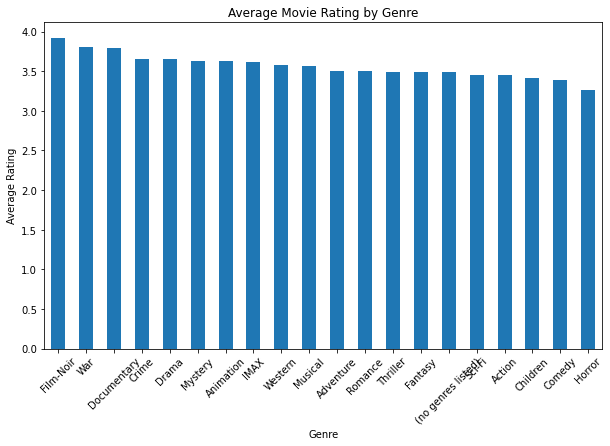

In [70]:
plt.figure(figsize=(10, 6))
genre_ratings.plot(kind='bar')
plt.title('Average Movie Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

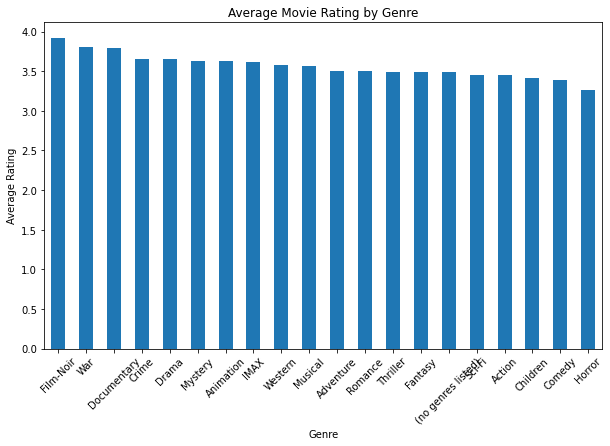

In [71]:
plt.figure(figsize=(10, 6))
genre_ratings.plot(kind='bar')
plt.title('Average Movie Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

<Figure size 864x576 with 0 Axes>

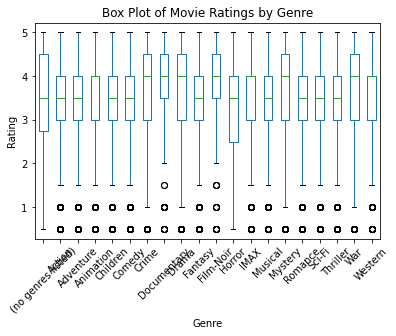

In [73]:
plt.figure(figsize=(12, 8))
merged_df.boxplot(column='rating', by='genres', grid=False)
plt.title('Box Plot of Movie Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.suptitle('')
plt.show()
